In [ ]:
!pip install mediapipe

In [ ]:
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [ ]:
def look_img(img):
    '''opencv读入图片格式为BGR，需要转化为RGB'''
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, axes = plt.subplots(1, 2, figsize=(15, 15))
    axes[0].imshow(img)
    axes[1].imshow(img_rgb)
    plt.show()

In [ ]:
mp_face_detect = mp.solutions.face_detection

In [21]:
model = mp_face_detect.FaceDetection(
    min_detection_confidence=0.7,
    model_selection=0#0用于人脸距离镜头近（2m以内）, 1为5m以内
)

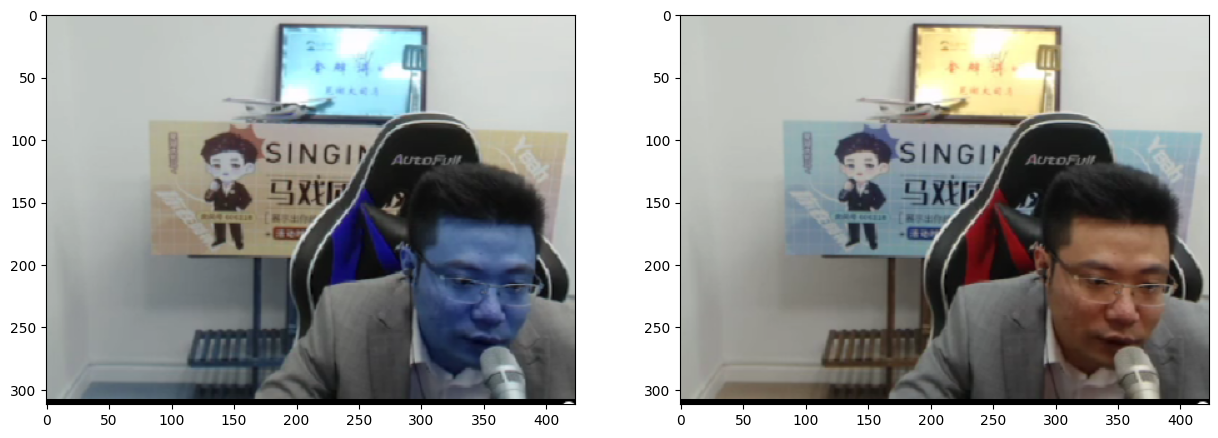

In [22]:
img = cv2.imread('img1.png')
look_img(img)

In [23]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model.process(img_rgb)

In [24]:
mp_drawing = mp.solutions.drawing_utils
keypoint_style = mp_drawing.DrawingSpec(thickness=5, circle_radius=2, color=(0, 255, 0))
bbox_style = mp_drawing.DrawingSpec(thickness=5, circle_radius=2, color=(255, 0, 0))


In [25]:
annotated_image = img.copy()
for detection in results.detections:
    mp_drawing.draw_detection(annotated_image, detection, keypoint_drawing_spec=keypoint_style, bbox_drawing_spec=bbox_style)

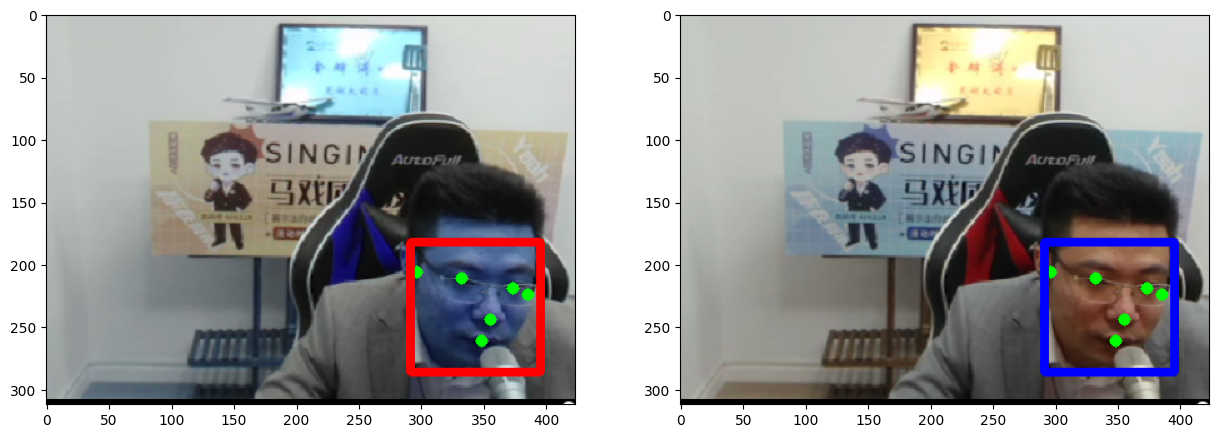

In [26]:
look_img(annotated_image)

In [27]:
def process_frame(img):
    start_time = time.time()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model.process(img)
    if results.detections:
        for detection in results.detections:
            mp_drawing.draw_detection(img,
                                      detection=detection,
                                      keypoint_drawing_spec=keypoint_style,
                                      bbox_drawing_spec=bbox_style
                                    )
    end_time = time.time()
    FPS = 1/(end_time-start_time)
    scaler = 1
    img = cv2.putText(img, 'FPS '+str(FPS), (25*scaler, 50*scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25*scaler, (255, 0, 0))
    return img

In [28]:
cap = cv2.VideoCapture(0)
cap.open(0)
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        print('error')
        break
    frame = process_frame(frame)
    cv2.imshow('my_window', frame)
    if cv2.waitKey(1) in [ord('q'), 27]:
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
import facenet_pytorch
from PIL import Image, ImageDraw
from facenet_pytorch import MTCNN, extract_face

In [13]:
model = MTCNN()
img = Image.open('img.png')
boxes, probs, points = model.detect(img, landmarks=True)

In [23]:
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
for i, (box, point) in enumerate(zip(boxes, points)):
    draw.rectangle(box.tolist(), width=1)
    for p in point:
        draw.rectangle((p - 10).tolist() + (p + 10).tolist(), width=2)
        extract_face(img, box, save_path='detected_face_{}.png'.format(i))
img_draw.save('./annotated_faces.png')

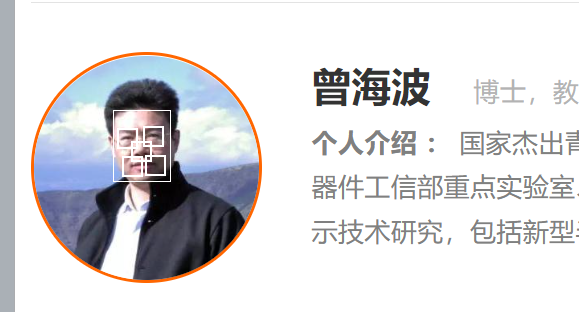

In [24]:
img_draw